## Adult census dataset

This dataset is openly accessible, either visit: UCI(University of California, Irvine) Machine Learning Repository, or Kaggle Adult Dataset.

AIM: To study about Census bureau Income Data Set (adult.csv) from kaggle.
  
  https://www.kaggle.com/code/alokevil/simple-eda-for-beginners/data

or can be found at
 http://www.census.gov/ftp/pub/DES/www/welcome.html
 

Data description:
    This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker 
    (Data Mining and Visualization, Silicon Graphics).
    The prediction task is to determine whether a person makes over $50K a year.

Fields/Attributes Included:
– Age
– Workclass
– Income
– Education
– Education-num
– Marital-status
– Occupation
– Relationship
– Race
– Sex
– Capital-gain
– Capital-loss
– Hours-per-week
– Native-country



- The goal of this machine learning project is to predict whether a person makes over $50K a year or not given their demographic variation,age,marital status and education. 
- This is a classification problem.

- Data preprocessing
The dataset contained null values, both numerical and categorical values. The categorical values were both nominal and ordinal. The data had redundant columns as well.

## Import the libraries

In [1]:

import pandas as pd  #used for data processing
import numpy as np   #for numerical calculations
import matplotlib.pyplot as plt #for data visualization and graphical plotting
import seaborn as sns


In [2]:
pd.options.display.max_rows =10
pd.options.display.max_columns = 20

## Importing the dataset

In [3]:
#replacing some special character columns names with proper names
df = pd.read_csv("adult.csv")
df.rename(columns={'educational-num':'educational_number','marital-status':'marital_status','capital-gain':'capital_gain','capital-loss':'capital_loss','hours-per-week':'weekly_hours','native-country':'native_country'},inplace =True)

In [4]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational_number',
       'marital_status', 'occupation', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'weekly_hours', 'native_country',
       'income'],
      dtype='object')

In [5]:
#shape of the dataset
df.shape

(48842, 15)

In [6]:
#finding if there are any null values 
df.isnull().sum()

age                   0
workclass             0
fnlwgt                0
education             0
educational_number    0
                     ..
capital_gain          0
capital_loss          0
weekly_hours          0
native_country        0
income                0
Length: 15, dtype: int64

## The number of missing data points per column

In [7]:
# Even though the dataset doesnot contain any nan values,it contains '?'
#we can find that the dataset contains missing values in the form of '?' for "workclass","occupation","native-country" columns
# so to find the missing value '?'
df.isin(['?']).sum(axis = 0)

age                      0
workclass             2799
fnlwgt                   0
education                0
educational_number       0
                      ... 
capital_gain             0
capital_loss             0
weekly_hours             0
native_country         857
income                   0
Length: 15, dtype: int64

## Data Analysis and Cleaning

### How many people in dataset have income >50K or <=50K

<=50K    37155
>50K     11687
Name: income, dtype: int64


<AxesSubplot:ylabel='income'>

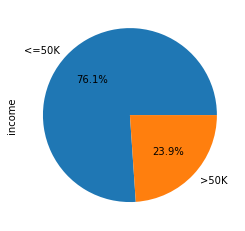

In [8]:
print(df['income'].value_counts())
df['income'].value_counts().plot.pie(autopct='%1.1f%%')

More people earn less or equal $ 5OK .

In [9]:
# Replace special character '?' with nan value in the respective columns 


df['workclass']= df['workclass'].replace('?',np.nan)

df['native_country']= df['native_country'].replace('?',np.nan)

df['occupation']= df['occupation'].replace('?',np.nan)


In [10]:
df.head()

,age,workclass,fnlwgt,education,educational_number,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,weekly_hours,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [11]:
df.shape

(48842, 15)

In [12]:
#number of duplicates in the dataset
df.duplicated().sum()

52

In [13]:
# Remove the duplicates
df = df.drop_duplicates()

In [14]:
df.shape

(48790, 15)

In [15]:
# drop rows with missing values nan 
df.dropna(how ='any',inplace = True)

In [16]:
df.shape

(45175, 15)

In [17]:
df.dtypes

age                    int64
workclass             object
fnlwgt                 int64
education             object
educational_number     int64
                       ...  
capital_gain           int64
capital_loss           int64
weekly_hours           int64
native_country        object
income                object
Length: 15, dtype: object

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45175 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 45175 non-null  int64 
 1   workclass           45175 non-null  object
 2   fnlwgt              45175 non-null  int64 
 3   education           45175 non-null  object
 4   educational_number  45175 non-null  int64 
 5   marital_status      45175 non-null  object
 6   occupation          45175 non-null  object
 7   relationship        45175 non-null  object
 8   race                45175 non-null  object
 9   gender              45175 non-null  object
 10  capital_gain        45175 non-null  int64 
 11  capital_loss        45175 non-null  int64 
 12  weekly_hours        45175 non-null  int64 
 13  native_country      45175 non-null  object
 14  income              45175 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


In [19]:
df.workclass.unique()

array(['Private', 'Local-gov', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay'], dtype=object)

In [20]:
#Replace state-gov,local-gov,federal-gov into 'Government'

#self-emp-not-inc and self-emp-inc as Self-employed

In [21]:
df= df.replace(dict.fromkeys(['State-gov','Local-gov','Federal-gov'],'Government'))

df=df.replace(dict.fromkeys(['Self-emp-not-inc','Self-emp-inc'],'Self-employed'))



In [22]:
#dropping workclass without-pay

df = df[df.workclass != 'Without-pay']
df.head() 

,age,workclass,fnlwgt,education,educational_number,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,weekly_hours,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Government,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [23]:
df.workclass.unique()

array(['Private', 'Government', 'Self-employed'], dtype=object)

In [24]:
df.occupation.value_counts()

Craft-repair       6009
Prof-specialty     6001
Exec-managerial    5979
Adm-clerical       5532
Sales              5404
                   ... 
Farming-fishing    1467
Tech-support       1419
Protective-serv     975
Priv-house-serv     230
Armed-Forces         14
Name: occupation, Length: 14, dtype: int64

In [25]:
# Change Armed forces occupation,which is ver small(15) to Protective serv
#df=df.replace(dict.fromkeys(['Protective-serv'], 'Armed-Forces'))

df.loc[df['occupation'] == 'Armed-Forces','occupation'] = 'Protective-serv'


In [26]:
df.marital_status.unique()

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Separated',
       'Divorced', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [27]:
df['marital_status'] = df['marital_status'].replace(['Married-civ-spouse','Married-AF-spouse'],'Married') 
df['marital_status'] = df['marital_status'].replace(['Never-married'],'Not Married') 

df['marital_status'] = df['marital_status'].replace(['Divorced','Married-spouse-absent','Widowed'],'Other') 

In [28]:
df.native_country.value_counts()


United-States         41236
Mexico                  895
Philippines             281
Germany                 193
Puerto-Rico             175
                      ...  
Laos                     21
Scotland                 20
Honduras                 19
Hungary                  18
Holand-Netherlands        1
Name: native_country, Length: 41, dtype: int64

- So we can take native country column as One US bin and the other non-US bin

In [29]:
df["native_country"] = np.where(df['native_country'] == 'United-States',
                            'USA',
                            'Non USA'
                            )

In [30]:
df.loc[df['educational_number'] <= 8,'education'] = 'Less than High School'
df.loc[df['educational_number'].isin ([9,10]),'education'] = 'High School'
df.loc[df['educational_number'].isin([11,12]),'education'] = 'Associates'

df.loc[df['educational_number'].isin ([13]),'education'] = 'Bachelors'

df.loc[df['educational_number'].isin([14]),'education'] = 'Masters'
df.loc[df['educational_number'].isin([15,16]),'education'] = 'PhD/Professional'



In [31]:
df.education.unique()

array(['Less than High School', 'High School', 'Associates',
       'PhD/Professional', 'Bachelors', 'Masters'], dtype=object)

In [32]:
df.head()

,age,workclass,fnlwgt,education,educational_number,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,weekly_hours,native_country,income
0,25,Private,226802,Less than High School,7,Not Married,Machine-op-inspct,Own-child,Black,Male,0,0,40,USA,<=50K
1,38,Private,89814,High School,9,Married,Farming-fishing,Husband,White,Male,0,0,50,USA,<=50K
2,28,Government,336951,Associates,12,Married,Protective-serv,Husband,White,Male,0,0,40,USA,>50K
3,44,Private,160323,High School,10,Married,Machine-op-inspct,Husband,Black,Male,7688,0,40,USA,>50K
5,34,Private,198693,Less than High School,6,Not Married,Other-service,Not-in-family,White,Male,0,0,30,USA,<=50K


- income column has two unique values i.e.,<=50K and >50K
- We can easily map these string characters to numerical data using .map() function 

In [33]:
# Using the map function,convert all the other categorical data in the dataset to numerical data.

In [34]:
# Mapping the categorical data into numerical data using map function

#income
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1}).astype(int)

In [35]:
#gender
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1}).astype(int)
#race
df['race'] = df['race'].map({'Black': 0, 'Asian-Pac-Islander': 1,'Other': 2, 'White': 3, 'Amer-Indian-Eskimo': 4}).astype(int)
#marital
#df['marital_status'] = df['marital_status'].map({'Married': 0, 'Not Married': 1, 'Other': 2}).astype(int)
#workclass
df['workclass'] = df['workclass'].map({'Self-employed': 0, 'Government': 1,'Private': 5}).astype(int)
#education
df['education'] = df['education'].map({'Less than High School': 0, 'High School': 1, 'Associates': 2, 'PhD/Professional': 3, 'Masters': 4, 'Bachelors': 5}).astype(int)
#occupation
df['occupation'] = df['occupation'].map({ 'Farming-fishing': 1, 'Tech-support': 2, 'Adm-clerical': 3, 'Handlers-cleaners': 4, 
 'Prof-specialty': 5,'Machine-op-inspct': 6, 'Exec-managerial': 7,'Priv-house-serv': 8,'Craft-repair': 9,'Sales': 10, 'Transport-moving': 11, 'Protective-serv': 12, 'Other-service': 13}).astype(int)
#relationship
df['relationship'] = df['relationship'].map({'Not-in-family': 0, 'Wife': 1, 'Other-relative': 2, 'Unmarried': 3,'Husband': 4,'Own-child': 5}).astype(int)       

In [37]:
#marital
#df['marital_status'] = df['marital_status'].map({'Married': 0, 'Not Married': 1, 'Other': 2}).astype(int)


IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [ ]:
# we can drop some irrelevent columns
df.drop(['fnlwgt','educational_number','capital_gain','capital_loss'],axis =1,inplace = True)

In [ ]:
df.weekly_hours.value_counts()

In [ ]:
df["native_country"] = np.where(df['native_country'] == 'United-States',
                            'USA',
                            'Non USA'
                            )

In [ ]:
df.head(20)

- Now the data is clean and can be fed into any ML predictive modeling algorithm.
- Next step is Data preprocessing 
- First lets see Data Visualization:

In [ ]:
df.corr()

In [ ]:
df.head()

In [ ]:
sns.heatmap(df.corr(),annot =True)

All the columns are weakly correlated

In [ ]:
df.hist(bins=20, figsize=(20, 15))
plt.show()

In [ ]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="income", y ="age", data=df)
plt.show()

In [ ]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="income", y="weekly_hours", data=df)
plt.show()

In [ ]:
df.head()

## Model Selection:


- Here our goal is to predict the income which can either be 0 or 1 ( less than 50K or greater than 50K) and we want to identify a relation between our output (income) and remaining independent features ( education, workclass, gender, etc. ). 
- This scenario is a classic example of Classification (classify whether income is <50K or more ).
- This is a Supervised Machine Learning Classification problem
- Based on these criteria we can narrow down our choice of models to a few:

Logistic Regression,
KNN or k-Nearest Neighbors,
Support Vector Machines,
Naive Bayes classifier,
Decision Tree,
Random Forest


In [ ]:
# X is the Independendent variable 
#y id Dependent (target) variable

#X =df.drop(['income'].axis =1)
#y =df['income']
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values


## Feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Splitting the dataset into the Training set and Test set

In [ ]:
# **** This step should come first before Feature scaling****

# from scikit learn library call model_selection Module and import train_test_split function
# random_state -- To display same result everytime.Controls randomization during splitting.
# Random split with same output for each function call



from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)



- Fit method uses the current data which is the training data to calculate the necessary  parameter to scale the data
- the transform method just applies the scaling.
   

In [ ]:
X_train

In [ ]:
X_test

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

- Training the logistic Regression model on Training set
### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)# This line of code will build Logistic regression Model but doesnt train it
classifier.fit(X_train, y_train)# next training our classifier on Training set

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),axis = 1))

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

print("Accuracy:",accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.metrics import average_precision_score, recall_score, f1_score

av = average_precision_score(y_test, y_pred)
re = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('average_precision_score:',av)
print('recall_score:',re)
print('f1_score:',f1)

- we achieved an accuracy value of 79.8% which is good for any machine learning prediction model particularly for a classification regression problem.

## Training Dataset

In [ ]:
from xgboost import XGBClassifier
classifier=XGBClassifier()
classifier.fit(X_train,Y_train)

## Making Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred=classifier.predict(X_test)
cm=confusion_matrix(Y_test,y_pred)
print(cm)
accuracy_score(Y_test,y_pred)

In [ ]:
print(y_pred)

## Applying K-fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=classifier,X=X_train,y=Y_train,cv=10)
print('Accuracy: {:.2f} Standard Deviation: {:.2f}'.format(accuracies.mean()*100,accuracies.std()*100))

## Predicting Test set Result

In [ ]:
print(np.concatenate((y_pred.reshape(len(y_pred),1),Y_test.reshape(len(Y_test),1)),1))